# Implementación Módulo 4

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [138]:
df = pd.read_csv("Datasets/processed_df.csv", sep=";")

In [139]:
df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]] = df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]].astype(str)

In [140]:
df["post_to_analize"] = df["lemmatized_post"] + " " + df["clean_title"]

In [141]:
df

,created_date,subreddit,title,author,full_link,score,post,sentiment,lemmatized_post,stemmed_post,clean_post,clean_title,post_to_analize
0,2009-06-23 16:50:44,artificial,Are worms intelligent?,ithkuil,https://www.reddit.com/r/artificial/comments/8...,3,This is me trying to start thinking about my o...,0,trying start thinking understanding intelligen...,tri start think understand intellig idea mayb ...,trying start thinking understanding intelligen...,worm intelligent,trying start thinking understanding intelligen...
1,2009-07-01 23:59:58,statistics,Is a masters in Statistics worth it?,nazghash,https://www.reddit.com/r/statistics/comments/8...,8,I'm working on an MS in Statistics at a state ...,0,working statistic state school curious useful ...,work ms statist state school curiou use ultim ...,working ms statistics state school curious use...,master statistic worth,working statistic state school curious useful ...
2,2009-07-05 07:39:04,statistics,Books/resources that discuss change point anal...,Abhishek_Ghose,https://www.reddit.com/r/statistics/comments/8...,2,I am looking for books/online-resources that d...,1,looking book online resource discus change poi...,look book onlin resourc discuss chang point an...,looking books online resources discuss change ...,book resource discus change point analysis,looking book online resource discus change poi...
3,2009-07-07 03:58:15,statistics,Pari-Mutuel Horse Racing Pool?,painperdu,https://www.reddit.com/r/statistics/comments/8...,0,Anyone study angles on how to beat a pari-mutu...,0,anyone study angle beat pari mutuel pool horse...,anyon studi angl beat pari mutuel pool hors ra...,anyone study angles beat pari mutuel pool hors...,pari mutuel horse racing pool,anyone study angle beat pari mutuel pool horse...
4,2009-07-21 16:55:04,statistics,Ask Stats: I got a BS in stats and I'm startin...,mathsuu,https://www.reddit.com/r/statistics/comments/9...,0,I should mention that I know SAS and R pretty ...,0,mention know sa pretty well sa certified yet t...,mention know sa pretti well sa certifi yet tak...,mention know sas pretty well sas certified yet...,ask stats got stats starting fall looking job ...,mention know sa pretty well sa certified yet t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274198,2022-05-08 18:00:10,MachineLearning,[D] Simple Questions Thread,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,1,Please post your questions here instead of cre...,0,please post question instead creating new thre...,pleas post question instead creat new thread e...,please post questions instead creating new thr...,simple question thread,please post question instead creating new thre...
274199,2022-05-08 18:13:53,computerscience,Question about binary code and files identity,pc0999,https://www.reddit.com/r/computerscience/comme...,1,"Hi, \n\nI am a philosophy student writing an e...",0,hi philosophy student writing essay digital th...,hi philosophi student write essay digit thing ...,hi philosophy student writing essay digital th...,question binary code file identity,hi philosophy student writing essay digital th...
274200,2022-05-08 18:15:56,dataengineering,Creating a data pipeline in AWS,OinkOink9,https://www.reddit.com/r/dataengineering/comme...,1,I want to create a data pipeline in AWS (free-...,0,want create data pipeline aws free tier accoun...,want creat data pipelin aw free tier account u...,want create data pipeline aws free tier accoun...,creating data pipeline aws,want create data pipeline aws free tier accoun...
274201,2022-05-08 19:01:40,dataengineering,I have a free pass to MLOps World in Toronto C...,Quiet_Basket_9699,https://www.reddit.com/r/dataengineering/comme...,1,You can see workshops etc www.MLOps world.com,1,see workshop etc,see workshop etc,see workshops etc,free pas mlops world toronto canada message in...,see workshop etc free pas mlops world toronto ...


## Lexicons

In [142]:
#Definimos una función para obtener en un diccionario las palabras con su puntuación
def collect_wordlist(input_file):
    word_dict = {}
    with open(input_file, encoding="ISO-8859-1") as f:
        for line in f:
            cols = line.split("\t")
            if len(cols)>2:
                word = cols[0].strip()
                score = float(cols[1].strip())
                word_dict[word] = score
    return word_dict

In [143]:
#Aplicamos la función a los lexicons que vamos a utilizar
adj_2000 = collect_wordlist("Datasets/lexicons/2000-adjetives.tsv")
words_2000 = collect_wordlist("Datasets/lexicons/2000-words.tsv")
programming_words = collect_wordlist("Datasets/lexicons/programming.tsv")

In [144]:
#Definimos la funcion para calcular la puntuación de un texto
def score_text(text, lexicons):
    score = 0
    for word in text.split():
        if word in lexicons:
            score += lexicons[word]
    return score

In [145]:
(df["sentiment"] == 0).sum()

np.int64(226544)

In [146]:
(df["sentiment"] == 1).sum()

np.int64(47659)

Vemos que la distribucion no es uniforme así que puede que no se consigan buenos resultados del todo

In [147]:
#Evaluamos la precisión de los lexicons

scores = []
for i in range(len(df)):
    text = df["post"][i]
    label = df["sentiment"][i]
    #media ponderada de los scores de las palabras en los lexicons
    score = 0.7 * score_text(text, programming_words) + 0.15 * score_text(text, adj_2000) + 0.15 * score_text(text, words_2000)
    if (score>0 and label==1) or (score<0 and label==0):
        scores.append(1)
    else:
        scores.append(0)
        
        
print("Accuracy mediante lexicons:", sum(scores)/len(scores))

Accuracy mediante lexicons: 0.660594523035853


Hemos realizado una media ponderada dando mas importancia a los scores de los lexicons de programación ya que son más específicos.

### Palabras únicas positivas/negativas

In [148]:
#Calculamos el vocabulario en cada post
df['post_vocab'] = df['post_to_analize'].str.split().apply(set)

# Vocabulary de post positivos
positive_vocabulary = set()
for post in df[df.sentiment==1].post_vocab:
    positive_vocabulary.update(post)
    
# Vocabulario de posts negativos
negative_vocabulary = set()
for post in df[df.sentiment==0].post_vocab:
    negative_vocabulary.update(post)
    
print('Tamaño vocabulario posts positivos:', len(positive_vocabulary))
print('Tamaño vocabulario posts negativos:', len(negative_vocabulary))

Tamaño vocabulario posts positivos: 47644
Tamaño vocabulario posts negativos: 146826


Vemos que el vocabulario está un poco desbalanceado ya que hay más posts negativos que positivos

In [149]:
#Nos quedamos con las palabras que solo aparecen en un tipo de post

positive_only_words = positive_vocabulary.difference(negative_vocabulary)
negative_only_words = negative_vocabulary.difference(positive_vocabulary)

In [150]:
def analyze_sentiment_by_vocab(post, positive_vocab, negative_vocab):
    words = post.split()
    # Contar palabras positivas y negativas
    positive_count = sum(1 for word in words if word in positive_vocab)
    negative_count = sum(1 for word in words if word in negative_vocab)
    
    # Clasificar el sentimiento según los conteos
    if positive_count > negative_count:
        return 1
    else:
        return 0
    

In [151]:
predicted_sentiment_by_vocab = df.post_to_analize.apply(lambda x: analyze_sentiment_by_vocab(x, positive_only_words, negative_only_words))

In [152]:
def evaluate_score(y_true, y_pred):
    scores = []
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            scores.append(1)
        else:
            scores.append(0)
            
    return sum(scores)/len(scores)


In [153]:
print("Accuracy mediante vocabulario general:", evaluate_score(df["sentiment"], predicted_sentiment_by_vocab))

Accuracy mediante vocabulario general: 0.8585135830023741


#### Analisis mediante Adjetivos por tipo de texto

Vamos a tomar un sample ya que el método tarda demasiado

In [154]:
df = df.sample(frac=0.3)

In [155]:
import spacy

nlp = spacy.load("en_core_web_sm")


positive_posts_adjectives = set()
for post in tqdm(df[df.sentiment==1].post_to_analize):
    positive_posts_adjectives.update([token.lemma_ for token in nlp(post) if token.pos_=='ADJ'])
    
negative_posts_adjectives = set()
for post in tqdm(df[df.sentiment==0].post_to_analize):
    negative_posts_adjectives.update([token.lemma_ for token in nlp(post) if token.pos_=='ADJ'])


positive_only_adjectives = positive_posts_adjectives.difference(negative_posts_adjectives)
negative_only_adjectives = negative_posts_adjectives.difference(positive_posts_adjectives)

100%|██████████| 68053/68053 [06:59<00:00, 162.21it/s]


In [156]:
predicted_sentiment_by_adj = df.post_to_analize.apply(lambda x: analyze_sentiment_by_vocab(x, positive_only_adjectives, negative_only_adjectives))


In [157]:
predicted_sentiment_by_adj

110220    0
42547     0
242083    1
188257    1
255398    0
         ..
179754    0
81735     0
195784    0
78404     0
39428     0
Name: post_to_analize, Length: 82261, dtype: int64

In [164]:
print("Accuracy mediante adjetivos:", evaluate_score(df["sentiment"].reset_index(drop=True), predicted_sentiment_by_adj.reset_index(drop=True)))

Accuracy mediante adjetivos: 0.8140187938391218


## SentiWordNet

In [159]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

In [160]:
def convert_tags(pos_tag):
    if pos_tag.startswith("JJ"):
        return wn.ADJ
    elif pos_tag.startswith("NN"):
        return wn.NOUN
    elif pos_tag.startswith("RB"):
        return wn.ADV
    elif pos_tag.startswith("VB") or pos_tag.startswith("MD"):
        return wn.VERB
    return None

In [161]:
def get_sentiment(word,tag):
    wn_tag = convert_tags(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
    lemma = wn.morphy(word, pos=wn_tag)
    if lemma is None:
        return []
    synsets = wn.synsets(lemma, pos=wn_tag)
    if not synsets:
        return []
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [162]:
def get_sentiment_for_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    pos_score = neg_score = obj_score = count = 0
    for word, tag in pos_tags:
        senti = get_sentiment(word, tag)
    if senti:
        pos_score += senti[0]
        neg_score += senti[1]
        obj_score += senti[2]
        count += 1
    return pos_score, neg_score, obj_score, count


In [165]:
def senti_word_net_score(df):
    for i in tqdm(range(len(df))):
        post = df["post_to_analize"][i]
        label = df["sentiment"][i]
        pos_score, neg_score, obj_score, count = get_sentiment_for_sentence(post)
        if (pos_score>neg_score and label==1) or (neg_score>pos_score and label==0):
            scores.append(1)
        else:
            scores.append(0)
    # Let's calculate the accuracy
    print("Accuracy:", sum(scores)/len(scores))
    
    
senti_word_net_score(df.reset_index(drop=True))

100%|██████████| 82261/82261 [02:53<00:00, 474.68it/s]


Accuracy: 0.47401781678234006


### WordEmbeddings 

In [166]:
df = pd.read_csv("Datasets/processed_df.csv", sep=";")

In [167]:
df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]] = df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]].astype(str)

In [168]:
df["post_to_analize"] = df["lemmatized_post"] + " " + df["clean_title"]

In [169]:
def load_glove():
    with open("Datasets/glove.6B.300d.txt", "r") as file:
        embeddings = {}
        for line in file:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
            
        return embeddings
    

embeddings = load_glove()

def text_to_glove(text):
    words = text.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

In [170]:
X_glove = df["post_to_analize"].apply(text_to_glove)

X_glove = np.array(X_glove.tolist())

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import time


def train_models(X, Y):
    
    # Datos de entrada y etiquetas
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Posibles modelos
    models = {
        "Logistic Regression": LogisticRegression(max_iter=5000, n_jobs=-1),
        #"Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        #"Gradient Boosting": GradientBoostingClassifier(max_depth=3,random_state=42)
    }

    # Probamos cada modelo
    results = {}
    for model_name, model in models.items():
        print(f"Entrenando: {model_name}")
        start = time.time()
        model.fit(X_train, Y_train)  # Entrenamos modelo
        end = time.time()
        Y_pred = model.predict(X_test)  # Predecimos etiquetas
        
        # Evaluamos el modelo
        accuracy = accuracy_score(Y_test, Y_pred)
        f1score = f1_score(Y_test, Y_pred, average='weighted')
        print(f"Tiempo de entrenamiento de {model_name}: {end - start:.2f}s")
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(f"{model_name} F1 Score: {f1score:.2f}")
        print(classification_report(Y_test, Y_pred))
        
        results[model_name] = f1score, accuracy

    # Mostramos el mejor modelo
    best_model = max(results, key=results.get)
    print(f"El mejor modelo es: {best_model} con una precisión de {results[best_model][1]:.2f} y un f1-score de {results[best_model][0]:.2f} ")
    return results



In [179]:
results = train_models(X_glove, df["sentiment"])

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 8.27s
Logistic Regression Accuracy: 0.84
Logistic Regression F1 Score: 0.82
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     67839
           1       0.64      0.27      0.38     14422

    accuracy                           0.84     82261
   macro avg       0.75      0.62      0.64     82261
weighted avg       0.82      0.84      0.82     82261

Entrenando: Random Forest
Tiempo de entrenamiento de Random Forest: 61.02s
Random Forest Accuracy: 0.85
Random Forest F1 Score: 0.80
              precision    recall  f1-score   support

           0       0.85      1.00      0.91     67839
           1       0.87      0.15      0.25     14422

    accuracy                           0.85     82261
   macro avg       0.86      0.57      0.58     82261
weighted avg       0.85      0.85      0.80     82261

Entrenando: Extra Trees
Tiempo de entrenamiento de Extra 

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results_from_training(results):
    model_names = list(results.keys())
    f1scores = [acc[0] for acc in results.values()] 

    palette = sns.color_palette("viridis", len(model_names))

    # Creamos el gráfico
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, f1scores, color=palette, height=0.4) 
    plt.xlabel('Precisión')
    plt.title('Resultados de los Modelos')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadimos etiquetas de precisión en las barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                va='center', ha='left', fontsize=10)

    plt.show()

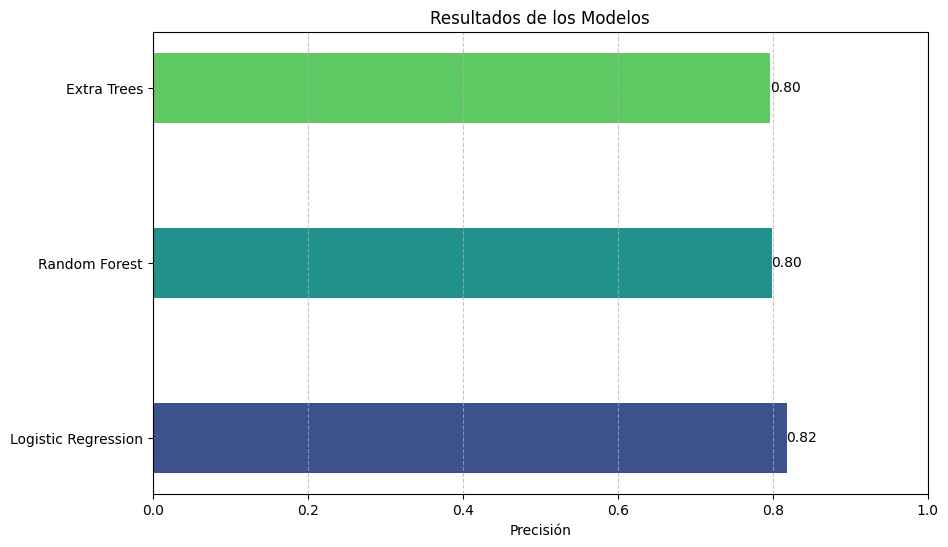

In [181]:
results = plot_results_from_training(results)

# Funcion Final

In [182]:
def sentiment_analysis(text:str):
    def load_glove():
        with open("Datasets/glove.6B.300d.txt", "r") as file:
            embeddings = {}
            for line in file:
                parts = line.strip().split()
                word = parts[0]
                vector = np.array(parts[1:], dtype=np.float32)
                embeddings[word] = vector
                
            return embeddings
    

    embeddings = load_glove()

    def text_to_glove(text):
        words = text.split()
        vectors = [embeddings[word] for word in words if word in embeddings]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(300)
        
    X_glove = df["post_to_analize"].apply(text_to_glove)

    X_glove = np.array(X_glove.tolist())
        
    Y = df.sentiment
    model = LogisticRegression(max_iter=5000, n_jobs=-1)
    model.fit(X_glove, Y)
    X_test = text_to_glove(text).reshape(1, -1)
    Y_pred = model.predict(X_test)
    return Y_pred[0]

In [183]:
sentiment_analysis("I love programming")

np.int64(1)

1 equivale a "POSITIVE"